<div style="text-align:center">
<img src="img/uncertainty.png">
</div>

# <b> Summary </b>
1. <b> Production mixe optimization using a normal law probability distribution</b>
    - Abstract
    - Instance
    - Math model
    - Python Pulp solution
2. <b> Inventory Management</b>
    - Abstract
    - Instance
    - Math model
    - Scipy solution
3. <b> Chairs and table retailer,  with uncertainty demand probability rules</b>
    - Abstract
    - Instance
    - Math model
    - Python Pulp solution




# <b>1. Production mixe optimization using a normal law probability distribution</b>


<div style="text-align:center">
<img src="img/precisioncombines_0.webp" width="500"/>
</div>

## <b> Abstract </b>
Sometimes, the profits are not too certain, to make a more realistic optimization, which remains linear, we can use the normal law. (Credit: Aaron Stubberfield)

Risks are taken into account: Profit estimates may be inaccurate.


Read this link from Aaron Stubberfield:
https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

We take our basic linear program and add the trick of the normal law.
The results are therefore different each time the program is reloaded, since the probability is recalculated each time.

## <b> Instance  </b>
Let's say we raise 3 types of plants, with fertilizer stock constraints.
Profits are not fixed and are weighted using a normal probability law , to better reflect uncertainty.
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Vegetable</b></th>
<td>1</td>
    <td>2</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Selling price</td>
    <td>10</td>
    <td>11</td>
    <td>11.5</td>

  </tr>
  <tr>
    <td>Fertilizer 1 cost</td>
       <td>0.7</td>
    <td>0.7</td>
    <td>0.8</td>

  </tr>
    <tr>
    <td>Fertilizer 2 cost</td>
        <td>0.45</td>
    <td>0.9</td>
    <td>0.3</td>

  </tr>
  <tr>
    <td>Selling Uncertainty </td>
    <td>standard deviation of 25</td>
     <td>standard deviation of 25</td>
      <td>standard deviation of 25</td>

  </tr>
 
   
</table> 

## <b> Math model  </b>
COmin" soon

## <b> Python Pulp code </b>

The trick : A probability is injected inside of the objective function.

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [32]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
import random
  
# -----------------------------------
# Probability
# -----------------------------------
a, b, c = random.normalvariate(0,25),random.normalvariate(0,25),random.normalvariate(0,25)

# -----------------------------------
# Type of problem
# -----------------------------------
pb = p.LpProblem('agricultural_profit_maximization', p.LpMaximize)  

# -----------------------------------
# Decision variables
# -----------------------------------
vegetable1 = p.LpVariable("vegetable1", 0, None, p.LpInteger)   
vegetable2 = p.LpVariable("vegetable2", 0, None, p.LpInteger)   
vegetable3 = p.LpVariable("vegetable3", 0, None, p.LpInteger)  

# -----------------------------------
# Math model
# -----------------------------------

# Objective
pb +=  (10 + a) * vegetable1 + (11 + b) * vegetable2  + (11.5 + c) * vegetable3

# Constraints

# fertilizer 1
pb += 0.7 * vegetable1 + 0.7 * vegetable2 + 0.8 * vegetable3 <= 600

# fertilizer 2
pb += 0.45* vegetable1 + 0.9 * vegetable2 + 0.3 * vegetable3 <= 700

# -----------------------------------
# Solution
# -----------------------------------
pb.solve()

for v in pb.variables():
    print(v.name, "=", v.varValue)

print("Total profit maximized = ", p.value(pb.objective))

print("Probabilistic profits:",a,b,c)

vegetable1 = 857.0
vegetable2 = 0.0
vegetable3 = 0.0
Total profit maximized =  23120.722168624816
Probabilistic profits: 16.978672308780414 -23.618480543002082 3.5210359558951048


# <b> 2.Inventory Management</b>

<div style="text-align:center">
<img src="img/breadinv.jpg" width="500"/>
</div>

<div style="text-align:center">
<img src="img/gemini.png" width="200"/>
</div>

## <b> Abstract </b>
Optimization under uncertainty (often called Stochastic Programming or Robust Optimization) is used when you need to make a decision now, but some of the data you rely on—like future demand, prices, or weather—is unknown.
A classic real-life example is the Newsvendor Problem.

Optimization under uncertainty (often called Stochastic Programming or Robust Optimization) is used when you need to make a decision now, but some of the data you rely on—like future demand, prices, or weather—is unknown.

A classic real-life example is the Newsvendor Problem.
The Real-Life Example: Inventory Management

Imagine you own a bakery. Every morning, you must decide how many loaves of sourdough bread to bake (x).

    The Uncertainty: You don't know exactly how many customers will show up today (D).

    The Cost of Underestimating: If you bake too little, you lose potential profit (opportunity cost).

    The Cost of Overestimating: If you bake too much, you have to throw away the extra bread at the end of the day (waste cost).

The goal is to find the "Goldilocks" number of loaves that minimizes your total expected cost (or maximizes expected profit) despite the uncertainty of demand.

## <b> Instance </b>

 <table style="margin: 0px auto;">
  <tr>
    <th><b>Bread</b></th>

  </tr>
  <tr>
    <td>Selling price</td>
    <td>5</td>

  </tr>
  <tr>
    <td>Cost</td>
    <td>2</td>

  </tr>
    <tr>
    <td>Waste Cost</td>
    <td>2</td>

  </tr>
  <tr>
    <td>Demand</td>
    <td>50 customers on average, with a standard deviation of 10</td>

  </tr>
 
   
</table> 


## <b> Math model  </b>




<div style="text-align:center">
<img src="img/Screenshot 2026-01-25 at 17-12-11 Google Gemini.png" width="1000"/>
</div>


## <b> Scipy solution</b>



<div style="text-align:center">
<img src="img/MINE_Python_Scipy_Logo.png" width="100">
</div>

In [33]:
import numpy as np
from scipy.optimize import minimize

# 1. Define our Parameters
cost_to_make = 2.00
selling_price = 5.00
waste_cost = 2.00  # Flour and labor lost per loaf
lost_profit = selling_price - cost_to_make # $3.00

# 2. Simulate Uncertainty (The Incertitude)
# We expect 50 customers on average, with a standard deviation of 10
np.random.seed(42)
simulated_demands = np.random.normal(loc=50, scale=10, size=10000)

# 3. Define the Objective Function (Expected Cost)
def expected_cost(x, demands, c_o, c_u):
    # Over-baking: loaves produced > demand
    overage = np.maximum(0, x - demands)
    # Under-baking: demand > loaves produced
    underage = np.maximum(0, demands - x)
    
    total_cost = (overage * c_o) + (underage * c_u)
    return np.mean(total_cost)

# 4. Optimize
initial_guess = 50
result = minimize(expected_cost, initial_guess, args=(simulated_demands, waste_cost, lost_profit))

if result.success:
    optimal_inventory = result.x[0]
    print(f"Optimal number of loaves to bake: {optimal_inventory:.2f}")
    print(f"Minimum expected cost: ${result.fun:.2f}")

Optimal number of loaves to bake: 52.50
Minimum expected cost: $19.36


<i>" Can you plot the result ?"</i> 

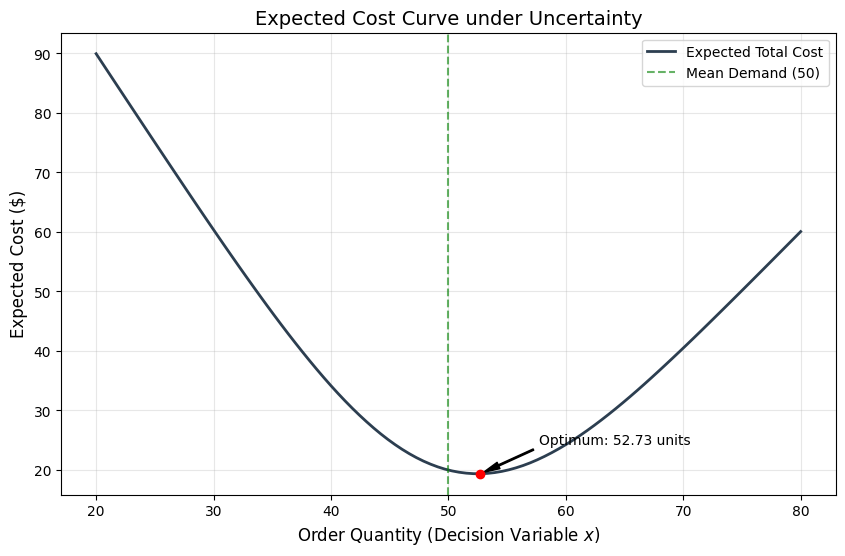

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Simulation Parameters
np.random.seed(42)
n_scenarios = 10000
mean_demand = 50
std_dev = 10

# Generate uncertain demand (The Incertitude)
demands = np.random.normal(mean_demand, std_dev, n_scenarios)

# 2. Costs
c_o = 2.00  # Overage: Cost of wasting one loaf
c_u = 3.00  # Underage: Opportunity cost of a lost sale

# 3. Define the Cost Function
def calculate_expected_cost(x):
    """Calculates avg cost for a fixed order quantity x across all scenarios"""
    overage_costs = np.maximum(0, x - demands) * c_o
    underage_costs = np.maximum(0, demands - x) * c_u
    return np.mean(overage_costs + underage_costs)

# 4. Generate Data for the Curve
# We test every quantity from 20 to 80 loaves
x_values = np.linspace(20, 80, 100)
y_costs = [calculate_expected_cost(val) for val in x_values]

# 5. Find the Mathematical Optimum for the plot
optimal_x = x_values[np.argmin(y_costs)]
min_cost = min(y_costs)

# 6. Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_costs, label='Expected Total Cost', color='#2c3e50', lw=2)

# Mark the Optimal Point
plt.scatter(optimal_x, min_cost, color='red', zorder=5)
plt.annotate(f'Optimum: {optimal_x:.2f} units', 
             xy=(optimal_x, min_cost), xytext=(optimal_x+5, min_cost+5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

# Formatting
plt.axvline(mean_demand, color='green', linestyle='--', alpha=0.6, label=f'Mean Demand ({mean_demand})')
plt.title('Expected Cost Curve under Uncertainty', fontsize=14)
plt.xlabel('Order Quantity (Decision Variable $x$)', fontsize=12)
plt.ylabel('Expected Cost ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

# <b>3. Chairs and table retailer,  with uncertainty demand probability rules</b>

<div style="text-align:center">
<img src="img/tableretail.jpg" width="500"/>
</div>

<div style="text-align:center">
<img src="img/chatgpt.png" width="200"/>
</div>

<i>Can you create a real life optimization of a chairs and table retailer, using pulp, with uncertainty probability rules inside of the objective function ?</i>

Absolutely! Let's carefully construct a real-life optimization problem for a chair and table retailer, incorporating uncertainty in demand via probabilistic modeling in the objective function using PuLP in Python. I’ll walk through it step by step.

## <b>Abstract</b>

Scenario

A retailer sells chairs and tables.

They have limited resources: budget and storage space.

Each product has a profit but also uncertain demand, modeled as probabilities.

Goal: maximize expected profit while considering demand uncertainty.

## <b>Instance</b>
We'll assume:

Chairs sell for $50 each, cost $20 each to produce.

Tables sell for $150 each, cost $100 each to produce.

Budget for production: $5000.

Storage space: 100 units total.

Demand for chairs: 80 units with 70% probability, 120 units with 30% probability.

Demand for tables: 30 units with 60% probability, 50 units with 40% probability.

We'll approximate expected profit using probabilities inside the objective function.

## <b>Math model</b>

Decision variables for production: chairs_prod, tables_prod

Auxiliary variables for sold quantity in each scenario: chairs_sold_scenario1, chairs_sold_scenario2, etc.

Objective: maximize expected profit across scenarios.

Constraints: production limits, budget, storage, and sold quantity ≤ production & scenario demand.

<i>Can you write down the linear pulp version math model?</i>



## <b>Python Pulp Solution</b>

In [35]:
import pulp

# Define problem
prob = pulp.LpProblem("Furniture_Optimization_Linearized", pulp.LpMaximize)

# Decision variables: production quantities
chairs_prod = pulp.LpVariable("Chairs_Produced", lowBound=0, cat='Integer')
tables_prod = pulp.LpVariable("Tables_Produced", lowBound=0, cat='Integer')

# Scenario data
chair_scenarios = [(80, 0.7), (120, 0.3)]   # (demand, probability)
table_scenarios = [(30, 0.6), (50, 0.4)]    # (demand, probability)

profit_chair = 30  # profit per chair
profit_table = 50  # profit per table

# Create auxiliary variables for sold quantities in each scenario
chairs_sold = {}
tables_sold = {}

for i, (demand, prob_s) in enumerate(chair_scenarios):
    chairs_sold[i] = pulp.LpVariable(f"Chairs_Sold_S{i}", lowBound=0, cat='Integer')
for i, (demand, prob_s) in enumerate(table_scenarios):
    tables_sold[i] = pulp.LpVariable(f"Tables_Sold_S{i}", lowBound=0, cat='Integer')



# Objective: maximize expected profit
expected_profit = pulp.lpSum([
    prob_s * profit_chair * chairs_sold[i] 
    for i, (demand, prob_s) in enumerate(chair_scenarios)
]) + pulp.lpSum([
    prob_s * profit_table * tables_sold[i] 
    for i, (demand, prob_s) in enumerate(table_scenarios)
])

# Constraints for sold quantities: cannot exceed production or demand
for i, (demand, prob_s) in enumerate(chair_scenarios):
    prob += chairs_sold[i] <= chairs_prod, f"ChairProdLimit_S{i}"
    prob += chairs_sold[i] <= demand, f"ChairDemandLimit_S{i}"

for i, (demand, prob_s) in enumerate(table_scenarios):
    prob += tables_sold[i] <= tables_prod, f"TableProdLimit_S{i}"
    prob += tables_sold[i] <= demand, f"TableDemandLimit_S{i}"

# Budget & storage constraints
prob += 20*chairs_prod + 100*tables_prod <= 5000, "BudgetConstraint"
prob += chairs_prod + tables_prod <= 100, "StorageConstraint"

prob += expected_profit
# print(prob)

# Solve
prob.solve()

# Results
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Optimal Chairs to produce: {chairs_prod.value()}")
print(f"Optimal Tables to produce: {tables_prod.value()}")
print(f"Expected Profit: ${pulp.value(prob.objective):.2f}")

# Optional: see sold quantities per scenario
for i in chairs_sold:
    print(f"Chairs sold in scenario {i}: {chairs_sold[i].value()}")
for i in tables_sold:
    print(f"Tables sold in scenario {i}: {tables_sold[i].value()}")

Status: Optimal
Optimal Chairs to produce: 70.0
Optimal Tables to produce: 30.0
Expected Profit: $3600.00
Chairs sold in scenario 0: 70.0
Chairs sold in scenario 1: 70.0
Tables sold in scenario 0: 30.0
Tables sold in scenario 1: 30.0


✅ Why This Works

Linearized min():
Each chairs_sold[i] ≤ chairs_prod and ≤ scenario demand.
This ensures sold quantity is the minimum of production and demand, without nonlinear min.

Expected profit:
Weighted by probabilities, fully linear.

Constraints:
Production, storage, budget — all linear.

This is now a fully linear stochastic optimization model — exactly the type used in real retailers to account for uncertain demand while making production decisions.

# <b> Chair and table retailer using normal law uncertainty and scipy</b>

<i>can you create a real life optimization of a chairs and table retailer, using scipy, with uncertainty normal law inside of the objective function ?</i>

In [36]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Product parameters
price = np.array([50, 150])
cost = np.array([30, 100])
salvage = np.array([10, 40])
mu_demand = np.array([200, 80])
sigma_demand = np.array([30, 20])

# Expected profit function
def expected_profit(x):
    x = np.array(x)
    profit = 0
    for i in range(2):  # two products: chairs and tables
        mu, sigma = mu_demand[i], sigma_demand[i]
        p, c, s = price[i], cost[i], salvage[i]
        # Probability demand <= order
        z = (x[i] - mu) / sigma
        Phi = norm.cdf(z)
        phi = norm.pdf(z)
        
        # Expected profit formula using normal properties
        expected = (p-c)*mu*Phi + (p-s)*sigma*phi + (s-c)*x[i]*Phi
        profit += expected
    # Negative because scipy minimizes
    return -profit

# Constraints: non-negative order quantities
bounds = [(0, None), (0, None)]

# Initial guess
x0 = [100, 50]

# Optimize
result = minimize(expected_profit, x0, bounds=bounds)

print("Optimal order quantities (chairs, tables):", result.x)
print("Maximum expected profit:", -result.fun)

Optimal order quantities (chairs, tables): [190.17176202  69.25320953]
Maximum expected profit: 1240.5873644110718


# <b> Links :</b>

Comin' soon

Ali Papi Rad :

📚 𝗕𝗲𝘀𝘁 𝗥𝗲𝗳𝗲𝗿𝗲𝗻𝗰𝗲𝘀 𝗼𝗳 𝗢𝗽𝘁𝗶𝗺𝗶𝘇𝗮𝘁𝗶𝗼𝗻 𝘂𝗻𝗱𝗲𝗿 𝗨𝗻𝗰𝗲𝗿𝘁𝗮𝗶𝗻𝘁𝘆

Recently, I introduced 𝟏𝟓 + 𝟏 𝐓𝐨𝐩 𝐀𝐩𝐩𝐫𝐨𝐚𝐜𝐡𝐞𝐬 𝐭𝐨 𝐎𝐩𝐭𝐢𝐦𝐢𝐳𝐚𝐭𝐢𝐨𝐧 𝐮𝐧𝐝𝐞𝐫 𝐔𝐧𝐜𝐞𝐫𝐭𝐚𝐢𝐧𝐭𝐲 (here: https://lnkd.in/d5iBxFJJ). As promised, reflecting on my own experience and after gathering feedback from my students, I’m excited to disclose the resources that have truly elevated our learning journeys. If you’ve discovered a resource not on this list that’s made a real insight for you, I’d love to hear about it in the comments!


✅ Stochastic Programming (SP)
[1] Birge et al. (2011). Introduction to Stochastic Programming. Springer Sci. & Bus. Media
[2] Shapiro et al. (2021). Lectures on Stochastic Programming: Modeling and Theory. SIAM

✅ Conditional Value‑at‑Risk (CVaR) Optimization
[3] Sarykalin et al. (2008). Value‑at‑Risk vs. Conditional Value‑at‑Risk in Risk Management and Optimization. INFORMS

✅ Chance‑Constrained Programming (CCP)
[4] Miller, B. L., & Wagner, H. M. (1965). Chance-constrained programming with joint constraints. Operations research, 13(6), 930-945.

✅ Sample Average Approximation (SAA)
[5] Kim et al. (2014). A Guide to Sample Average Approximation. Handb. Simul. Optim.
 [6] Pagnoncelli et al. (2009). Sample Average Approximation Method for Chance Constrained Programming: Theory and Applications. J. Optim. Theory Appl.

✅ Robust Optimization (RO)
[7] Bertsimas et al. (2011). Theory and Applications of Robust Optimization. SIAM Rev.
[8] Gorissen et al. (2015). A Practical Guide to Robust Optimization. Omega
[9] Gabrel et al. (2014). Recent Advances in Robust Optimization: An Overview. Eur. J. Oper. Res.


✅ Distributionally Robust Optimization (DRO)
[10] Van Parys et al. (2021). From Data to Decisions: Distributionally Robust Optimization Is Optimal. Manag. Sci.
[11] Delage et al. (2010). Distributionally Robust Optimization Under Moment Uncertainty with Application to Data‑Driven Problems. Oper. Res.
[12] Mohajerin Esfahani et al. (2018). Data‑Driven Distributionally Robust Optimization Using the Wasserstein Metric: Performance Guarantees and Tractable Reformulations. Math. Program.
[13] Rahimian et al. (2022). Frameworks and Results in Distributionally Robust Optimization. Open J. Math. Optim.